<a href="https://colab.research.google.com/github/maitri66/CrimeSync-Analytics/blob/main/Welcome_To_Colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

To learn more about accelerating pandas on Colab, see the [10 minute guide](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_colab_demo.ipynb) or
 [US stock market data analysis demo](https://colab.research.google.com/github/rapidsai-community/showcase/blob/main/getting_started_tutorials/cudf_pandas_stocks_demo.ipynb).

✅ Synthetic datasets generated: kyc_data.csv & criminal_records.csv
KYC Data Sample:
  kyc_number               name  \
0    KYC0001       Allison Hill   
1    KYC0002  Kimberly Robinson   
2    KYC0003       Valerie Gray   
3    KYC0004         Mia Sutton   
4    KYC0005        Ethan Adams   

                                          address  gender         dob  \
0      819 Johnson Course, East William, AK 74064   Other  1965-03-11   
1  65423 Garcia Light, West Melanieview, AS 06196    Male  1993-04-30   
2  310 Kendra Common Apt. 164, Reidstad, GA 49021  Female  1973-06-25   
3           327 Nelson Route, Lake Mark, WI 07832    Male  1966-10-16   
4  76724 John Points Suite 969, Coxberg, NY 65187   Other  1959-06-21   

  country_of_origin  
0             India  
1           Germany  
2               USA  
3               USA  
4             India  

Criminal Records Data Sample:
  kyc_number offense_type  severity date_of_incident jurisdiction case_status
0    KYC0045   Cybercrim

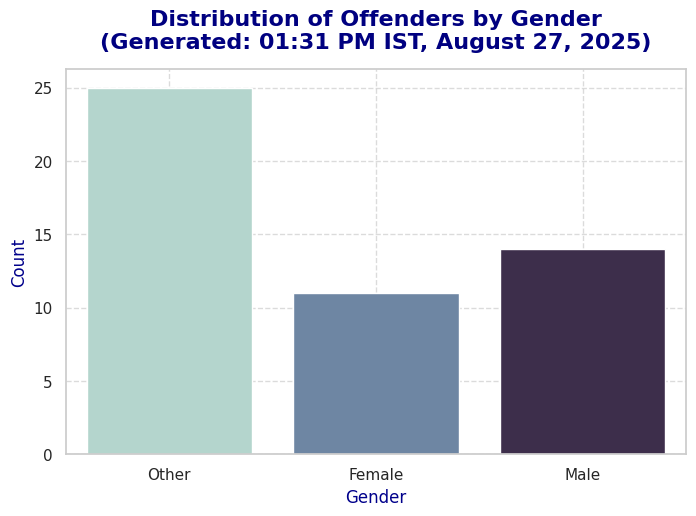

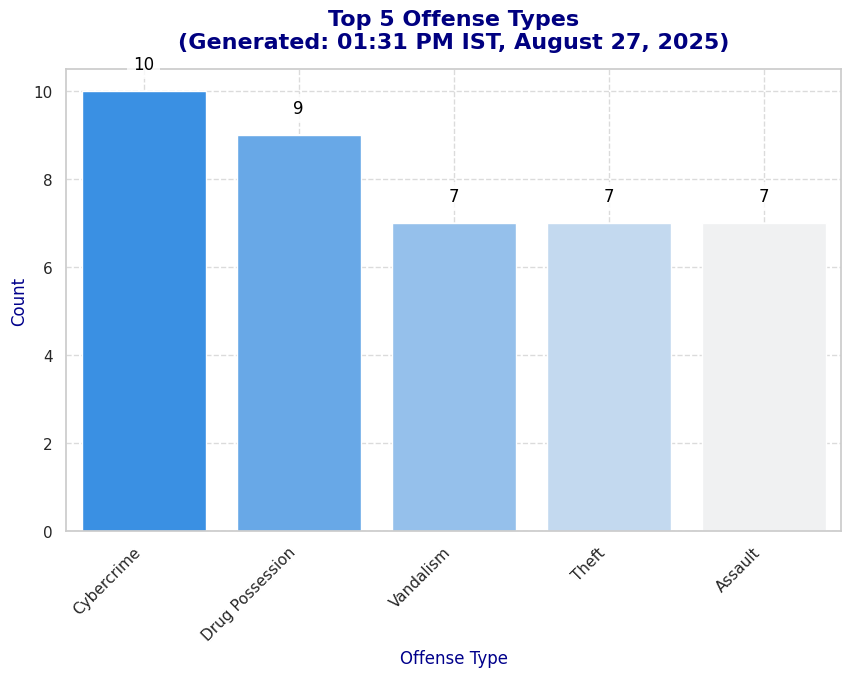

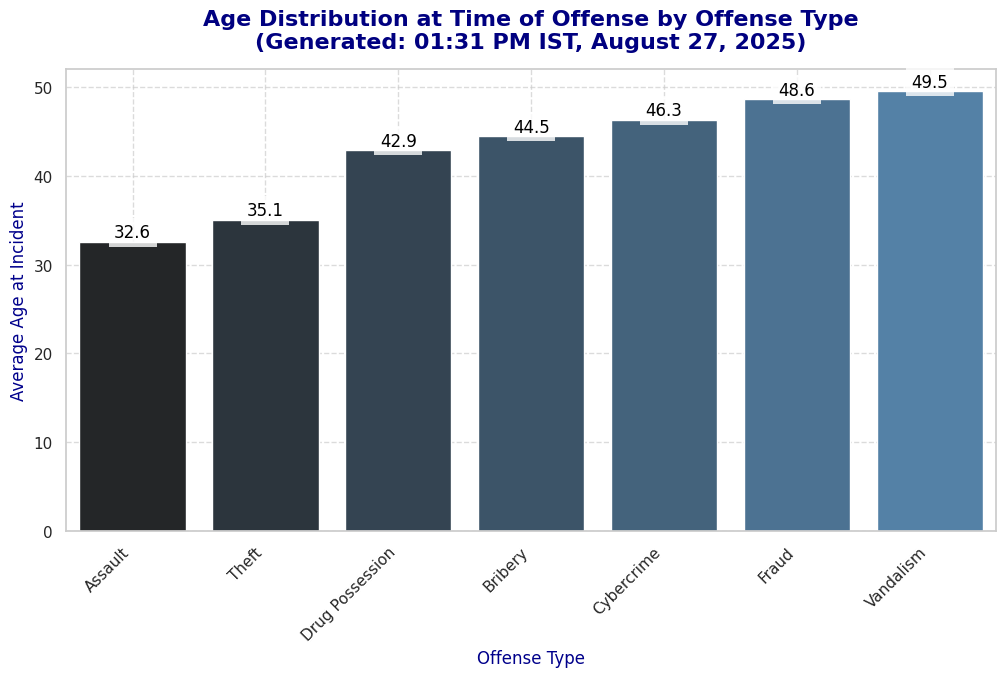

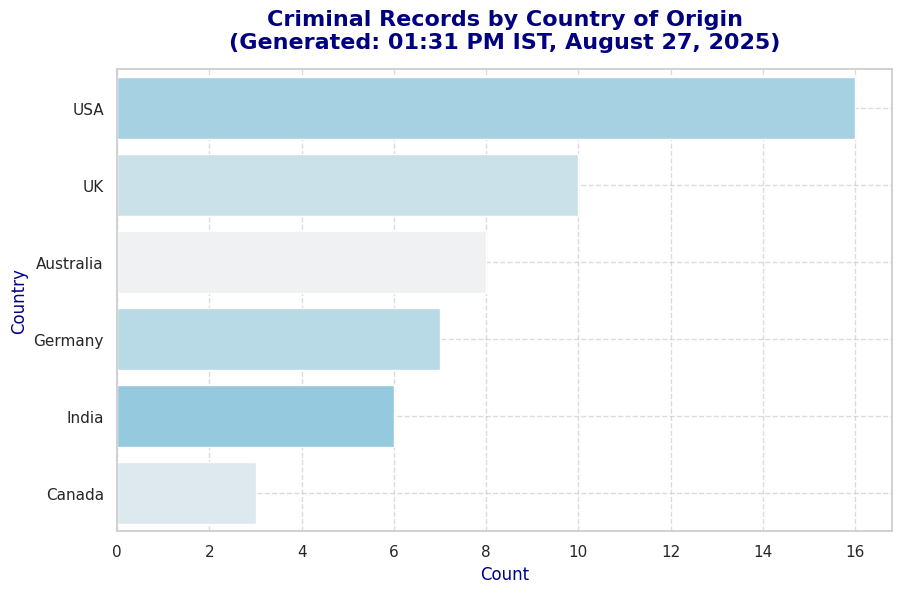

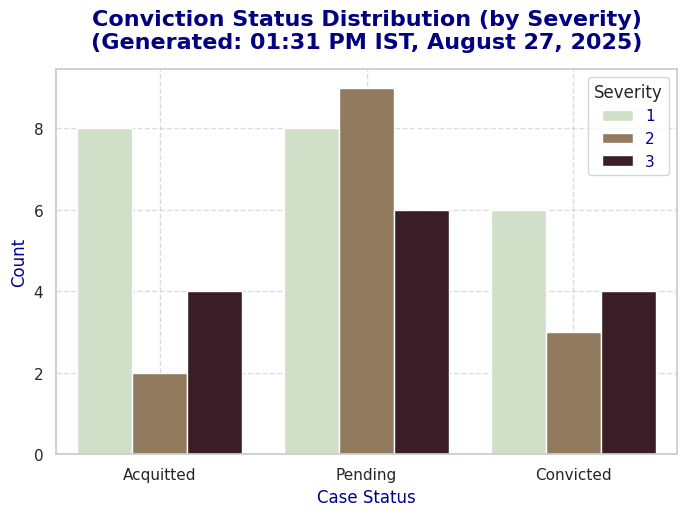

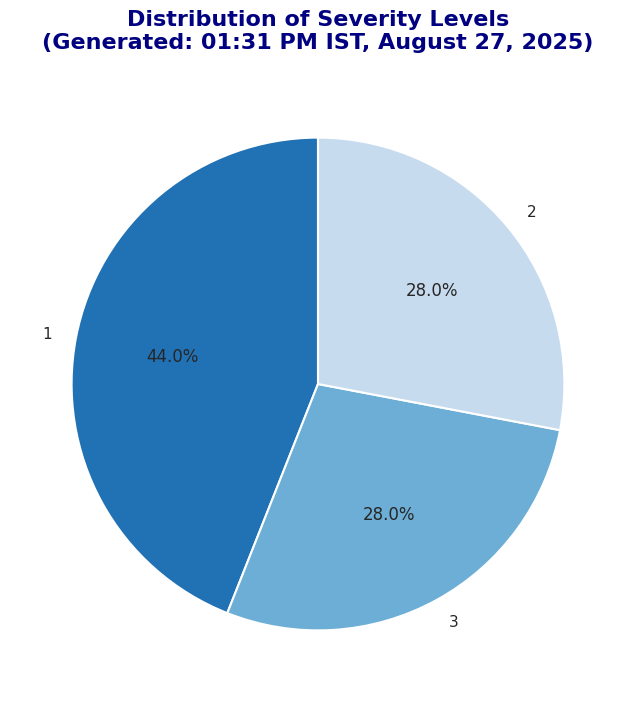

/tmp/ipython-input-2492647751.py:201: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="severity", y="age_at_incident", data=merged, palette=sns.color_palette("muted", n_colors=3), boxprops=dict(edgecolor='black', linewidth=1.5))


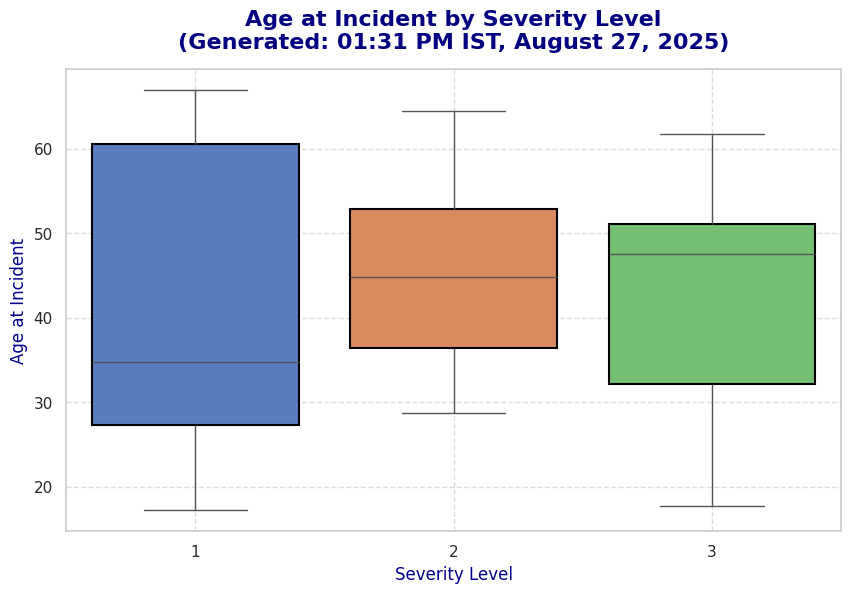

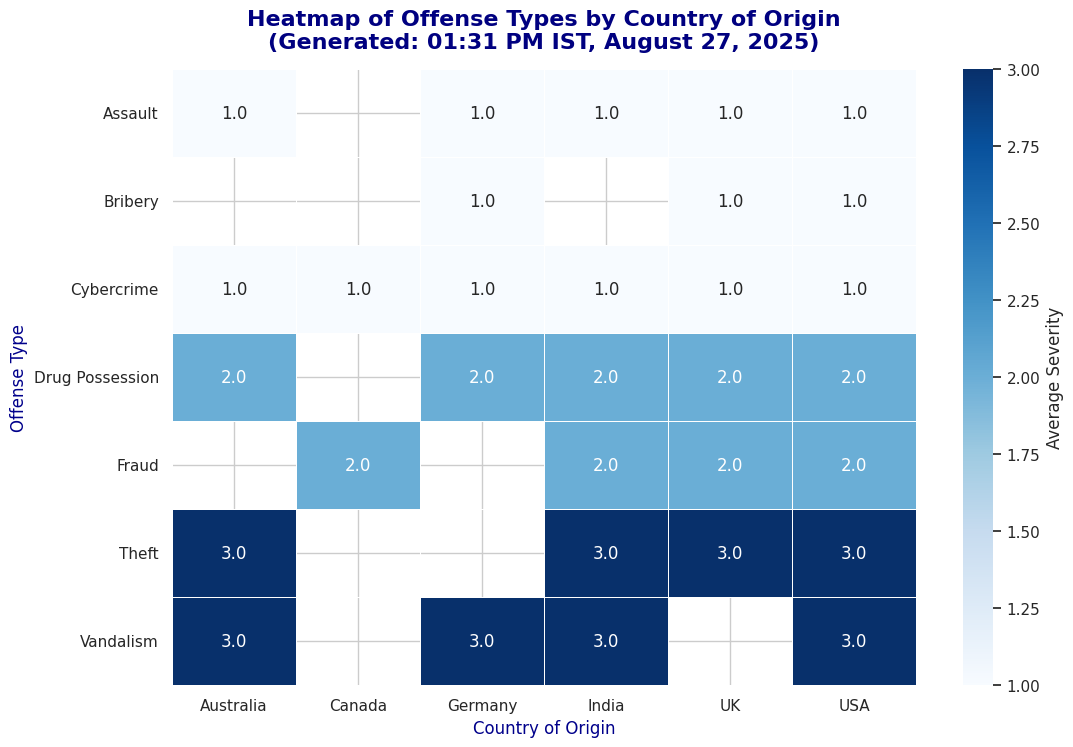

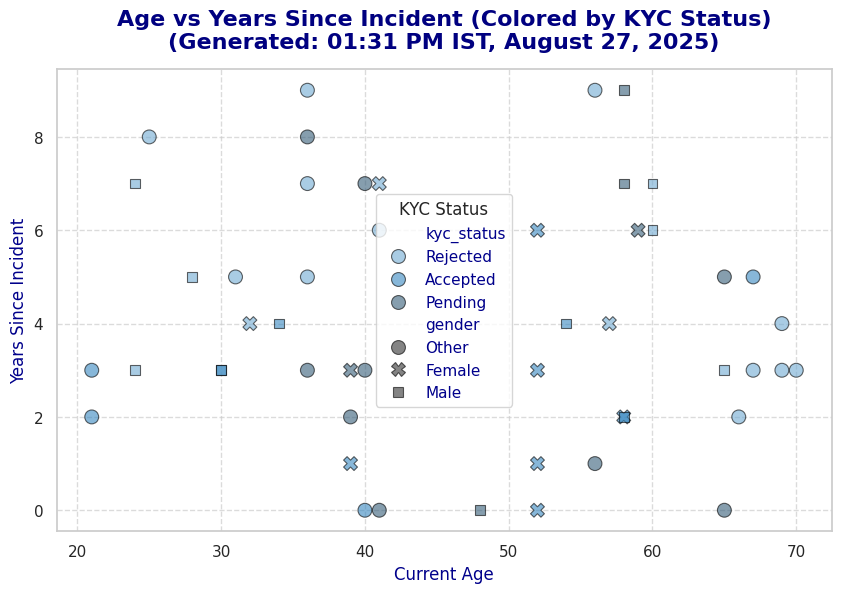

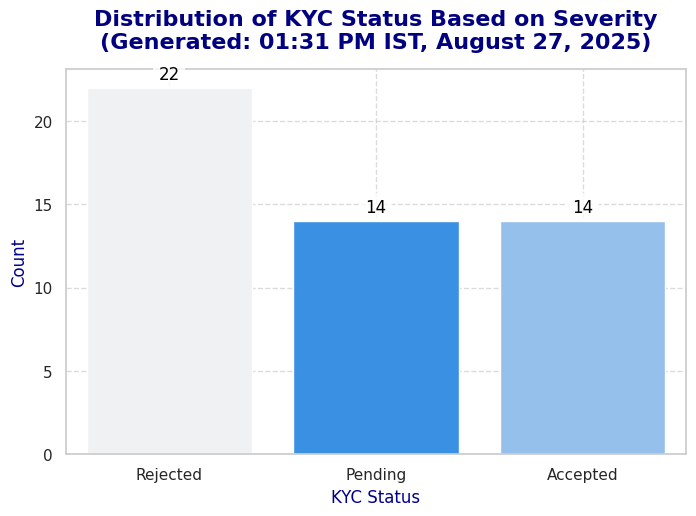

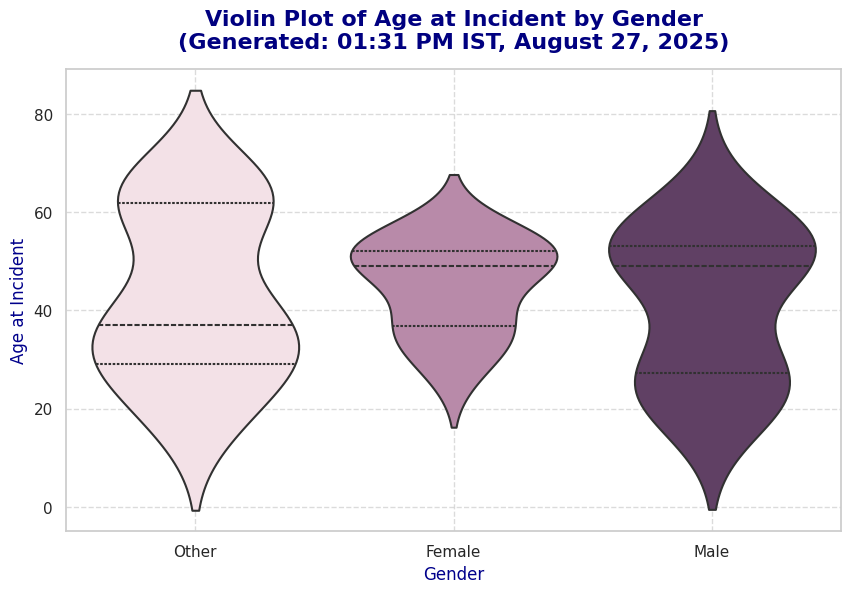

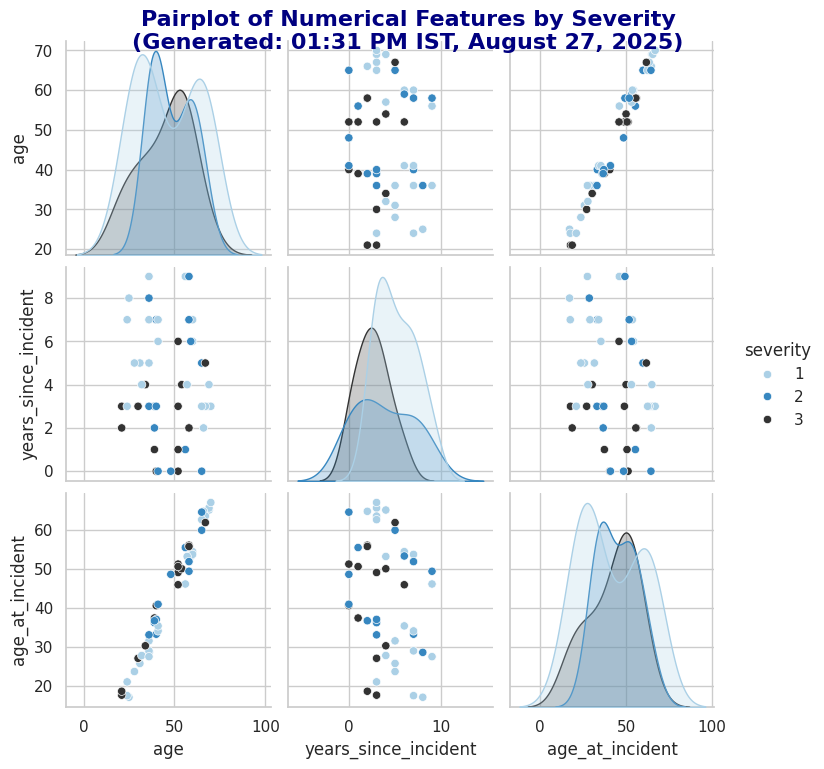

Merged Dataset Shape: (50, 15)

Sample Merged Dataset:
  kyc_number     offense_type  severity date_of_incident jurisdiction  \
0    KYC0045       Cybercrime         1       2015-09-30          USA   
1    KYC0021        Vandalism         3       2023-09-13        India   
2    KYC0003        Vandalism         3       2024-08-31           UK   
3    KYC0018            Theft         3       2022-06-06          USA   
4    KYC0046          Assault         1       2017-03-26          USA   
5    KYC0032  Drug Possession         2       2020-01-26      Germany   
6    KYC0010          Assault         1       2019-02-09          USA   
7    KYC0048       Cybercrime         1       2021-07-12    Australia   
8    KYC0048       Cybercrime         1       2022-01-16       Canada   
9    KYC0026          Assault         1       2019-11-24          USA   

  case_status                name  \
0   Acquitted      Timothy Carter   
1     Pending         Martin Ross   
2   Convicted        Valerie G

In [24]:
# ==============================
# Enhanced Synthetic KYC & Criminal Records Dataset Generator + Analysis
# ==============================
# This script generates synthetic KYC and criminal records data, merges them,
# performs cleaning and transformations, and generates enhanced visualizations
# including additional charts for deeper insights. Severity levels are added
# to offenses, and a KYC status is derived based on severity:
# - Level 1: Rejected (severe crimes like Assault, Cybercrime, Bribery)
# - Level 2: Pending (medium crimes like Fraud, Drug Possession)
# - Level 3: Accepted (low crimes like Theft, Vandalism)

!pip install faker

import pandas as pd
import numpy as np
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time

# Set up Faker with seed for reproducibility
fake = Faker()
Faker.seed(42)
random.seed(42)
np.random.seed(42)

# Define current date as per provided context (August 27, 2025)
CURRENT_DATE = datetime(2025, 8, 27)

# -------------------------------
# 1. Generate KYC Data (50 unique individuals)
# -------------------------------
# Parameters for synthetic data generation
num_individuals = 50
genders = ["Male", "Female", "Other"]
countries = ["India", "USA", "UK", "Canada", "Australia", "Germany"]

kyc_data = []
for i in range(num_individuals):
    kyc_number = f"KYC{i+1:04d}"
    name = fake.name()
    address = fake.address().replace("\n", ", ")
    gender = random.choice(genders)
    dob = fake.date_of_birth(minimum_age=18, maximum_age=70)
    country = random.choice(countries)

    kyc_data.append([kyc_number, name, address, gender, dob.strftime("%Y-%m-%d"), country])

kyc_df = pd.DataFrame(kyc_data, columns=["kyc_number", "name", "address", "gender", "dob", "country_of_origin"])

# -------------------------------
# 2. Generate Criminal Records (30-50 records, not all individuals have records)
# -------------------------------
offense_types = ["Theft", "Fraud", "Assault", "Drug Possession", "Cybercrime", "Bribery", "Vandalism"]
case_statuses = ["Pending", "Convicted", "Acquitted"]

# Define severity mapping for offenses
severity_map = {
    "Assault": 1,       # Severe -> Rejected
    "Cybercrime": 1,    # Severe -> Rejected
    "Bribery": 1,       # Severe -> Rejected
    "Fraud": 2,         # Medium -> Pending
    "Drug Possession": 2,  # Medium -> Pending
    "Theft": 3,         # Low -> Accepted
    "Vandalism": 3      # Low -> Accepted
}

criminal_data = []
num_records = random.randint(30, 50)  # Random number of records
for _ in range(num_records):
    kyc_number = random.choice(kyc_df["kyc_number"].tolist())
    offense = random.choice(offense_types)
    severity = severity_map[offense]
    date_incident = fake.date_between(start_date="-10y", end_date=CURRENT_DATE)
    jurisdiction = random.choice(countries)
    case_status = random.choice(case_statuses)

    criminal_data.append([kyc_number, offense, severity, date_incident.strftime("%Y-%m-%d"), jurisdiction, case_status])

criminal_df = pd.DataFrame(criminal_data, columns=["kyc_number", "offense_type", "severity", "date_of_incident", "jurisdiction", "case_status"])

# Save datasets to CSV
kyc_df.to_csv("kyc_data.csv", index=False)
criminal_df.to_csv("criminal_records.csv", index=False)

print("✅ Synthetic datasets generated: kyc_data.csv & criminal_records.csv")

# -------------------------------
# 3. Data Ingestion and Merging
# -------------------------------
kyc = pd.read_csv("kyc_data.csv")
criminal = pd.read_csv("criminal_records.csv")

print("KYC Data Sample:")
print(kyc.head())
print("\nCriminal Records Data Sample:")
print(criminal.head())

# Merge datasets on kyc_number (left join to include only those with criminal records)
merged = pd.merge(criminal, kyc, on="kyc_number", how="left")

# -------------------------------
# 4. Data Cleaning & Transformation
# -------------------------------
# Convert date columns to datetime
merged["dob"] = pd.to_datetime(merged["dob"], errors="coerce")
merged["date_of_incident"] = pd.to_datetime(merged["date_of_incident"], errors="coerce")

# Derived features using the fixed current date
today = pd.Timestamp(CURRENT_DATE)
merged["age"] = (today - merged["dob"]).dt.days // 365  # Integer age
merged["years_since_incident"] = (today - merged["date_of_incident"]).dt.days // 365  # Integer years
merged["age_at_incident"] = (merged["date_of_incident"] - merged["dob"]).dt.days / 365.25  # Float for precision

# Derive KYC status based on severity
status_map = {1: "Rejected", 2: "Pending", 3: "Accepted"}
merged["kyc_status"] = merged["severity"].map(status_map)

# Handle any missing values (e.g., drop rows with NaN in key columns)
merged = merged.dropna(subset=["age", "age_at_incident", "years_since_incident"])

# -------------------------------
# 5. Enhanced Insights & Visualizations
# -------------------------------
# Current timestamp for titles
current_time = datetime(2025, 8, 27, 13, 31).strftime("%I:%M %p IST, %B %d, %Y")

# (a) Distribution of Offenders by Gender (Countplot with cubehelix shades)
plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=merged, palette=sns.cubehelix_palette(n_colors=3, start=0.5, rot=-0.5, dark=0.2, light=0.8), hue='gender', legend=False)
plt.title(f"Distribution of Offenders by Gender\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Gender", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (b) Top 5 Offense Types (Bar Plot with gradient shades)
plt.figure(figsize=(10, 6))
top_offenses = merged["offense_type"].value_counts().head(5)
sns.barplot(x=top_offenses.index, y=top_offenses.values, palette=sns.light_palette("#1E90FF", as_cmap=False, n_colors=5, reverse=True), hue=top_offenses.index, legend=False)
plt.title(f"Top 5 Offense Types\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Offense Type", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(top_offenses.values):
    plt.text(i, v + 0.5, str(v), color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.show()
time.sleep(0.2)

# (c) Age Distribution at Time of Offense by Offense Type (Bar Plot with dark shades)
plt.figure(figsize=(12, 6))
age_by_offense = merged.groupby("offense_type")["age_at_incident"].mean().sort_values()
sns.barplot(x=age_by_offense.index, y=age_by_offense.values, palette=sns.dark_palette("#4682B4", n_colors=len(age_by_offense)), hue=age_by_offense.index, legend=False)
plt.title(f"Age Distribution at Time of Offense by Offense Type\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Offense Type", fontsize=12, color='darkblue')
plt.ylabel("Average Age at Incident", fontsize=12, color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(age_by_offense.values):
    plt.text(i, v + 0.5, f"{v:.1f}", color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.show()
time.sleep(0.2)

# (d) Criminal Records by Country of Origin (Horizontal Countplot with pastel shades)
plt.figure(figsize=(10, 6))
sns.countplot(y="country_of_origin", data=merged, order=merged["country_of_origin"].value_counts().index, palette=sns.light_palette("#87CEEB", reverse=True), hue="country_of_origin", legend=False)
plt.title(f"Criminal Records by Country of Origin\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Count", fontsize=12, color='darkblue')
plt.ylabel("Country", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (e) Conviction Status Distribution (Countplot with Hue and gradient)
plt.figure(figsize=(8, 5))
sns.countplot(x="case_status", data=merged, hue="severity", palette=sns.cubehelix_palette(n_colors=3, start=0.5, rot=0.5))
plt.title(f"Conviction Status Distribution (by Severity)\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Case Status", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.legend(title="Severity", title_fontsize=12, labelcolor='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (f) Distribution of Severity Levels (Pie Chart with vibrant shades)
plt.figure(figsize=(8, 8))
severity_counts = merged["severity"].value_counts()
colors = sns.color_palette("Blues_r", n_colors=len(severity_counts))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'antialiased': True})
plt.title(f"Distribution of Severity Levels\n(Generated: {current_time})", fontsize=16, pad=20, fontweight='bold', color='navy')
plt.ylabel("")  # Hide y-label for pie chart
plt.show()
time.sleep(0.2)

# (g) Age at Incident by Severity (Boxplot with muted shades and shadow)
plt.figure(figsize=(10, 6))
sns.boxplot(x="severity", y="age_at_incident", data=merged, palette=sns.color_palette("muted", n_colors=3), boxprops=dict(edgecolor='black', linewidth=1.5))
plt.title(f"Age at Incident by Severity Level\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Severity Level", fontsize=12, color='darkblue')
plt.ylabel("Age at Incident", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (h) Heatmap of Offense Types by Country (with enhanced colormap)
plt.figure(figsize=(12, 8))
crosstab = pd.crosstab(merged["offense_type"], merged["country_of_origin"], values=merged["severity"], aggfunc='mean')
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5, linecolor='white', cbar_kws={'label': 'Average Severity'})
plt.title(f"Heatmap of Offense Types by Country of Origin\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Country of Origin", fontsize=12, color='darkblue')
plt.ylabel("Offense Type", fontsize=12, color='darkblue')
plt.show()
time.sleep(0.2)

# (i) Age vs Years Since Incident (Scatter Plot with Hue and transparency)
plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="years_since_incident", data=merged, hue="kyc_status", style="gender", s=100, palette="Blues_d", alpha=0.6, edgecolor='black')
plt.title(f"Age vs Years Since Incident (Colored by KYC Status)\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Current Age", fontsize=12, color='darkblue')
plt.ylabel("Years Since Incident", fontsize=12, color='darkblue')
plt.legend(title="KYC Status", title_fontsize=12, labelcolor='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (j) Distribution of KYC Status (Bar Plot with gradient shades)
plt.figure(figsize=(8, 5))
sns.countplot(x="kyc_status", data=merged, order=["Rejected", "Pending", "Accepted"], palette=sns.light_palette("#1E90FF", as_cmap=False, n_colors=3), hue="kyc_status", legend=False)
plt.title(f"Distribution of KYC Status Based on Severity\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("KYC Status", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(merged["kyc_status"].value_counts()[["Rejected", "Pending", "Accepted"]].values):
    plt.text(i, v + 0.5, str(v), color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
plt.show()
time.sleep(0.2)

# (k) Violin Plot of Age at Incident by Gender (with varied shades)
plt.figure(figsize=(10, 6))
sns.violinplot(x="gender", y="age_at_incident", data=merged, inner="quart", palette=sns.cubehelix_palette(n_colors=3, start=0.2, rot=0.2, dark=0.3, light=0.9), linewidth=1.5, hue='gender', legend=False)
plt.title(f"Violin Plot of Age at Incident by Gender\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Gender", fontsize=12, color='darkblue')
plt.ylabel("Age at Incident", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()
time.sleep(0.2)

# (l) Pairplot for Numerical Features (with enhanced palette)
g = sns.pairplot(merged[["age", "years_since_incident", "age_at_incident", "severity"]], hue="severity", palette="Blues_d")
plt.suptitle(f"Pairplot of Numerical Features by Severity\n(Generated: {current_time})", fontsize=16, y=1.02, fontweight='bold', color='navy')
plt.show()

# -------------------------------
# 6. Output Summary and Tables
# -------------------------------
print("Merged Dataset Shape:", merged.shape)
print("\nSample Merged Dataset:")
print(merged.head(10))  # Show more rows for detail

# Additional Table: Crosstab of Offense vs KYC Status
print("\nCrosstab of Offense Type vs KYC Status:")
offense_status_crosstab = pd.crosstab(merged["offense_type"], merged["kyc_status"])
print(offense_status_crosstab)



✅ Synthetic datasets generated: kyc_data.csv & criminal_records.csv
KYC Data Sample:
  kyc_number               name  \
0    KYC0001       Allison Hill   
1    KYC0002  Kimberly Robinson   
2    KYC0003       Valerie Gray   
3    KYC0004         Mia Sutton   
4    KYC0005        Ethan Adams   

                                          address  gender         dob  \
0      819 Johnson Course, East William, AK 74064   Other  1965-03-11   
1  65423 Garcia Light, West Melanieview, AS 06196    Male  1993-04-30   
2  310 Kendra Common Apt. 164, Reidstad, GA 49021  Female  1973-06-25   
3           327 Nelson Route, Lake Mark, WI 07832    Male  1966-10-16   
4  76724 John Points Suite 969, Coxberg, NY 65187   Other  1959-06-21   

  country_of_origin  
0             India  
1           Germany  
2               USA  
3               USA  
4             India  

Criminal Records Data Sample:
  kyc_number offense_type  severity date_of_incident jurisdiction case_status
0    KYC0045   Cybercrim

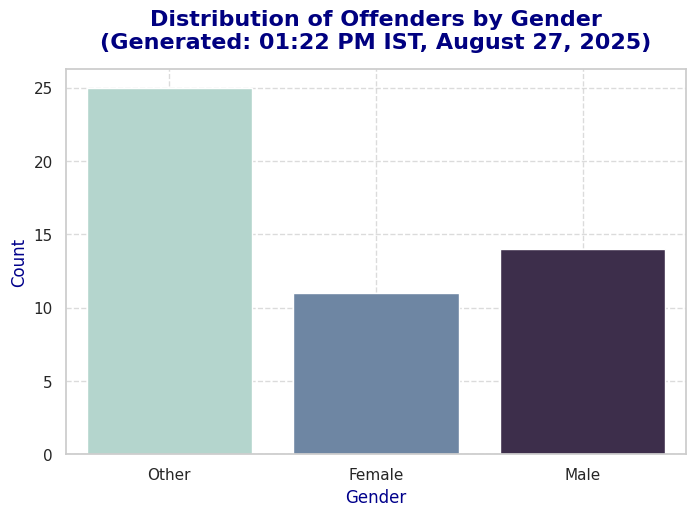

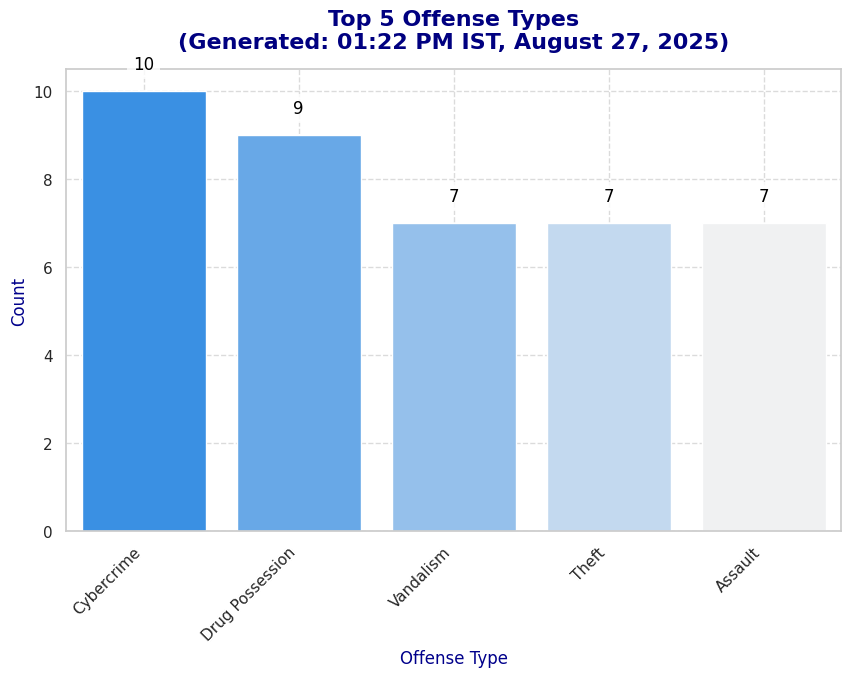

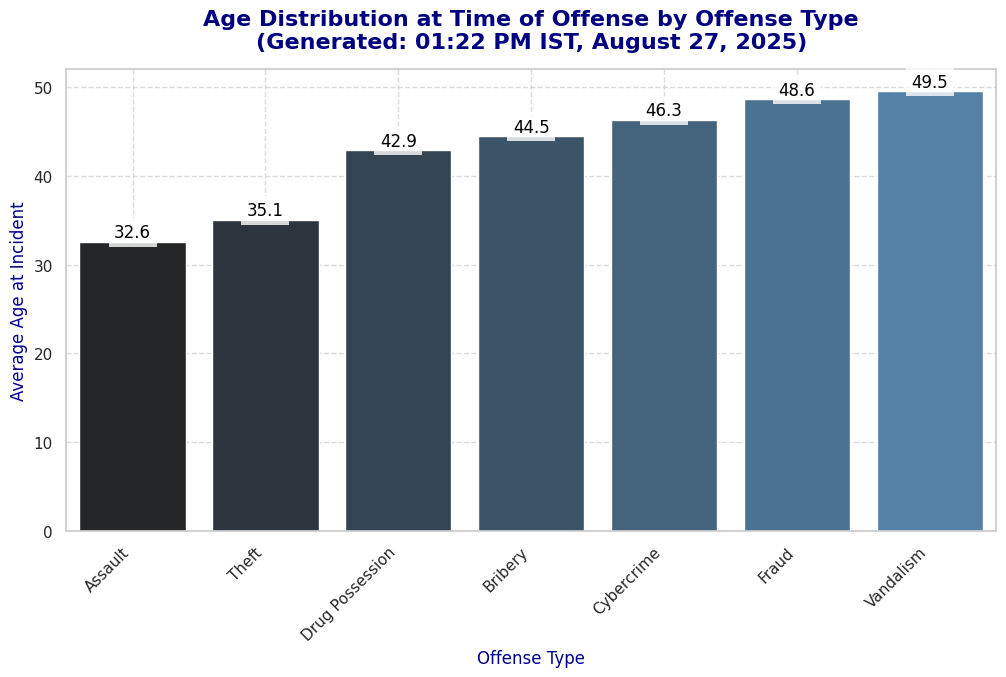

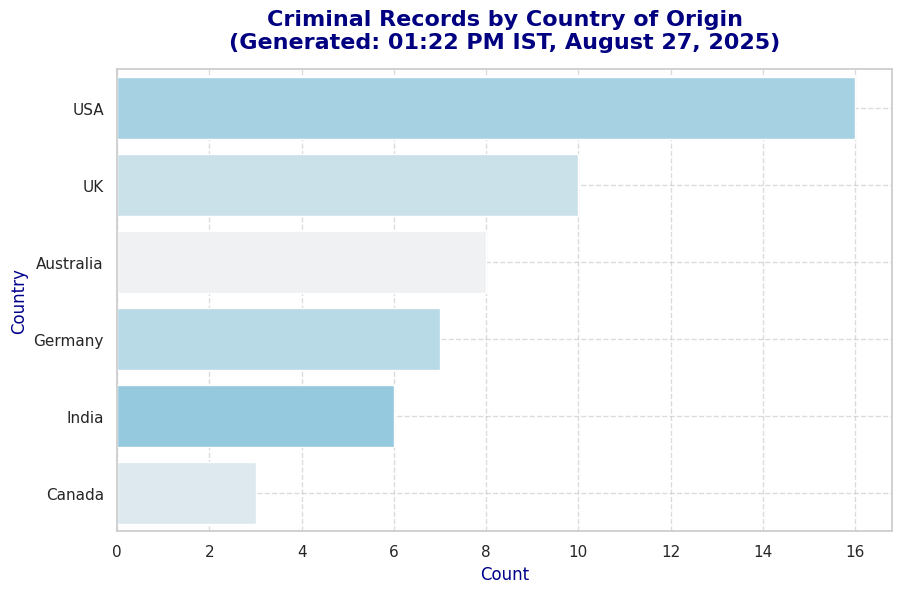

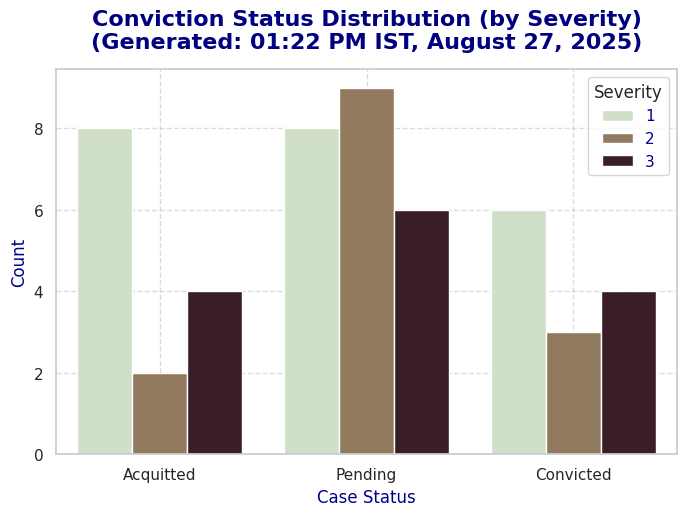

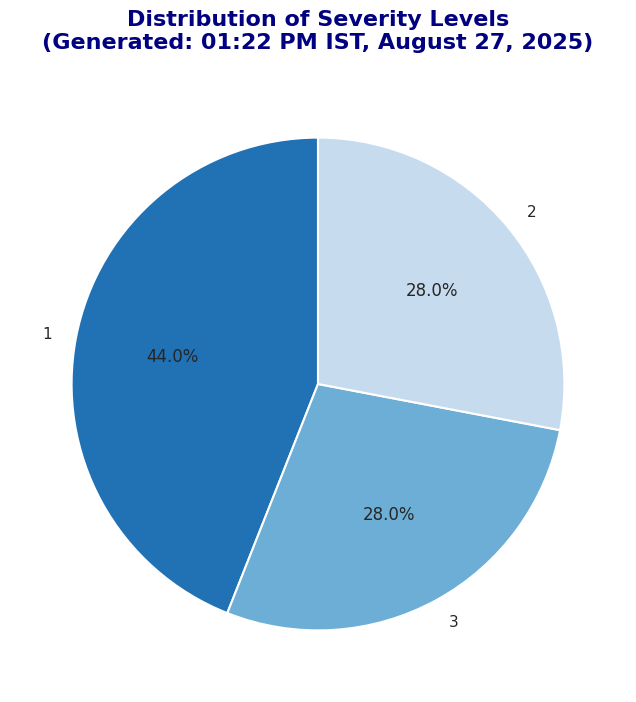

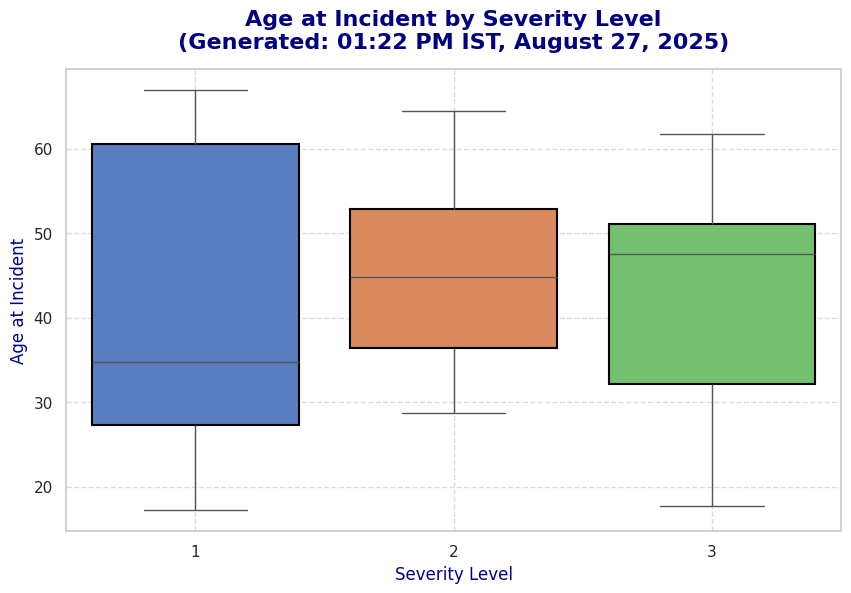

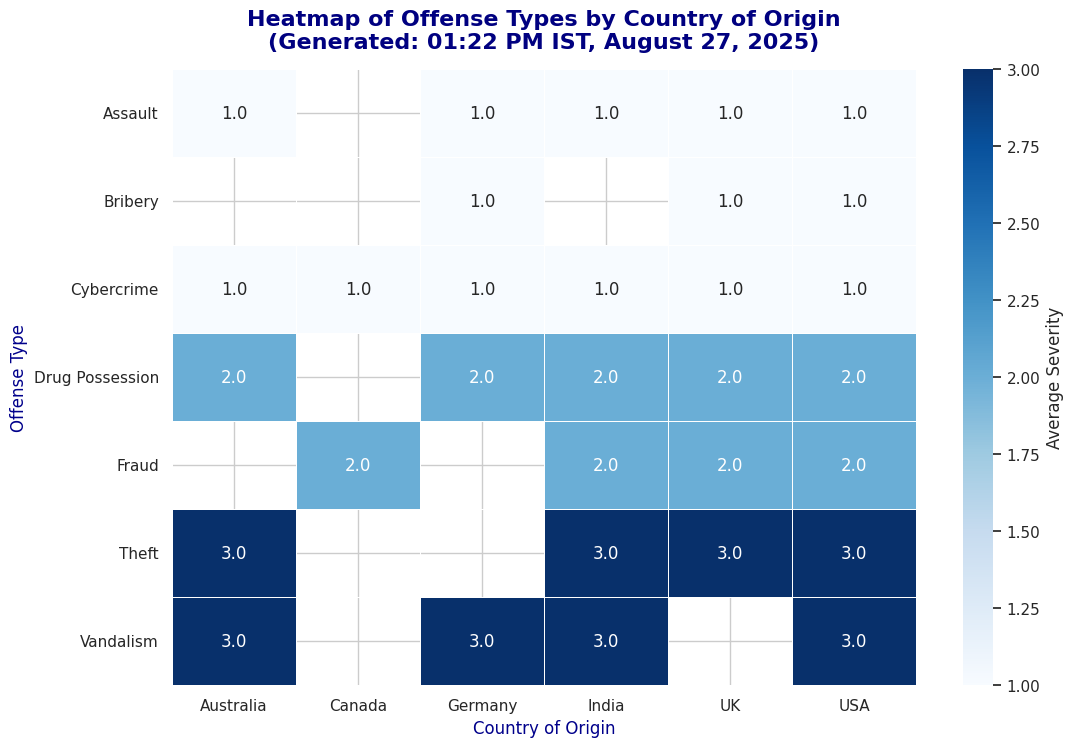

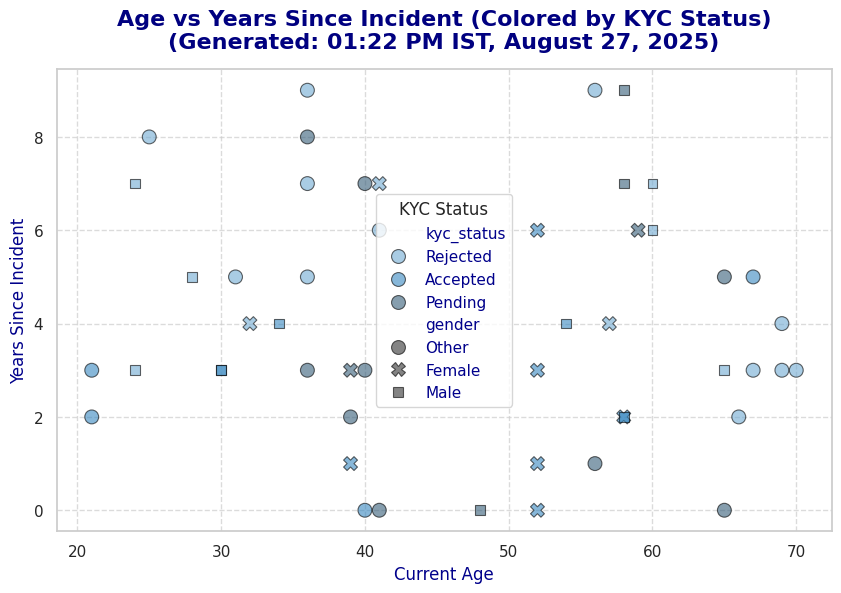

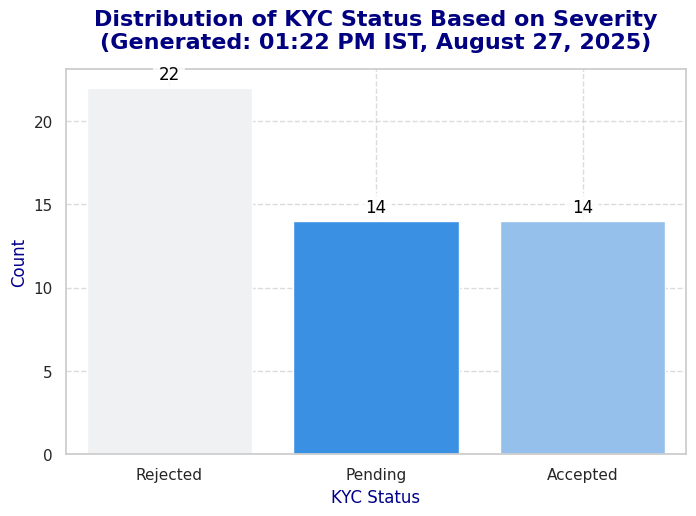

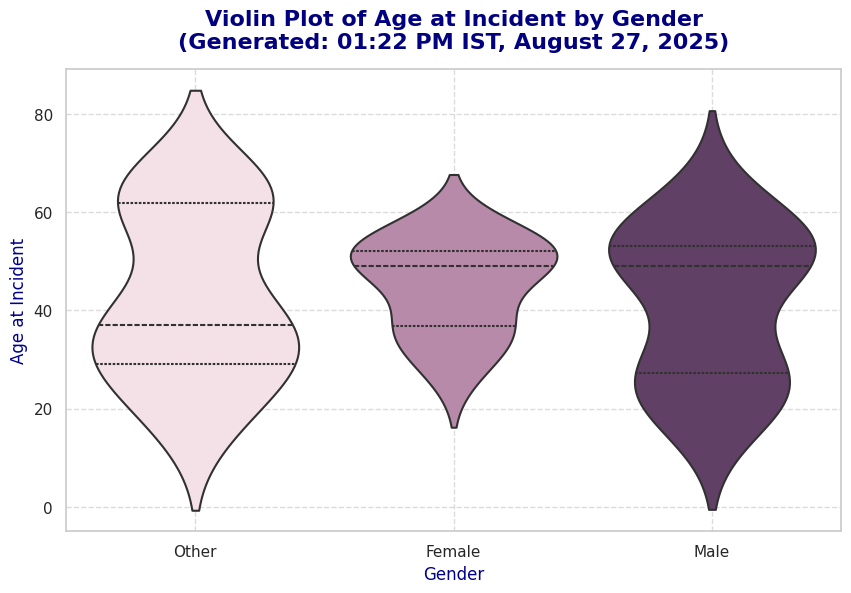

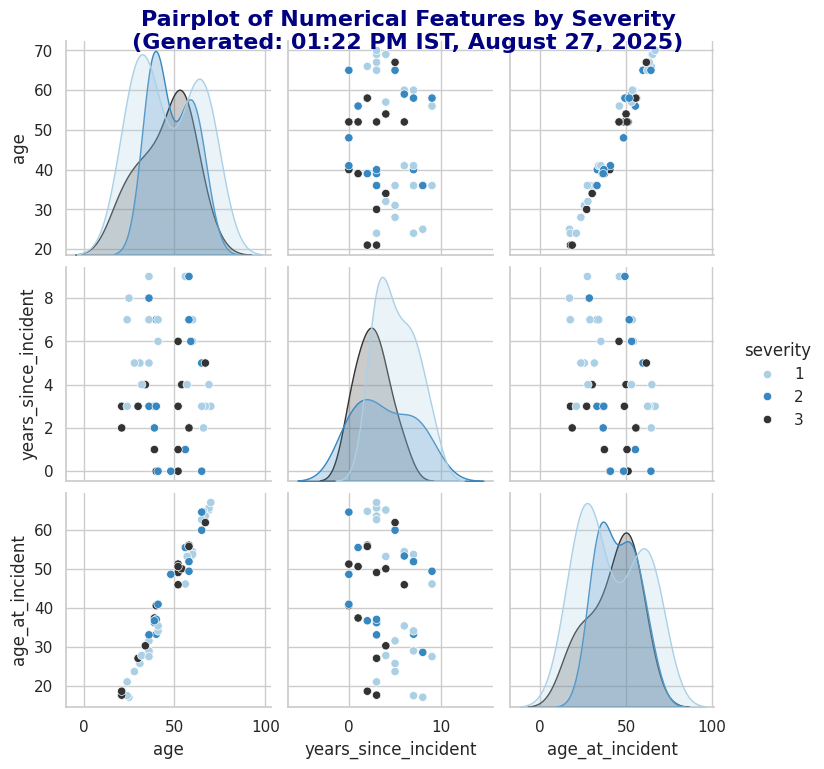

Merged Dataset Shape: (50, 15)

Sample Merged Dataset:
  kyc_number     offense_type  severity date_of_incident jurisdiction  \
0    KYC0045       Cybercrime         1       2015-09-30          USA   
1    KYC0021        Vandalism         3       2023-09-13        India   
2    KYC0003        Vandalism         3       2024-08-31           UK   
3    KYC0018            Theft         3       2022-06-06          USA   
4    KYC0046          Assault         1       2017-03-26          USA   
5    KYC0032  Drug Possession         2       2020-01-26      Germany   
6    KYC0010          Assault         1       2019-02-09          USA   
7    KYC0048       Cybercrime         1       2021-07-12    Australia   
8    KYC0048       Cybercrime         1       2022-01-16       Canada   
9    KYC0026          Assault         1       2019-11-24          USA   

  case_status                name  \
0   Acquitted      Timothy Carter   
1     Pending         Martin Ross   
2   Convicted        Valerie G

<Figure size 1200x1000 with 0 Axes>

In [25]:
# ==============================
# Enhanced Synthetic KYC & Criminal Records Dataset Generator + Analysis
# ==============================
# This script generates synthetic KYC and criminal records data, merges them,
# performs cleaning and transformations, and generates enhanced visualizations
# including additional charts for deeper insights. Severity levels are added
# to offenses, and a KYC status is derived based on severity:
# - Level 1: Rejected (severe crimes like Assault, Cybercrime, Bribery)
# - Level 2: Pending (medium crimes like Fraud, Drug Possession)
# - Level 3: Accepted (low crimes like Theft, Vandalism)

!pip install faker

import pandas as pd
import numpy as np
import random
from faker import Faker
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from IPython.display import display, HTML, Image
import os
import time

# Set up Faker with seed for reproducibility
fake = Faker()
Faker.seed(42)
random.seed(42)
np.random.seed(42)

# Define current date as per provided context (August 27, 2025)
CURRENT_DATE = datetime(2025, 8, 27)

# -------------------------------
# 1. Generate KYC Data (50 unique individuals)
# -------------------------------
# Parameters for synthetic data generation
num_individuals = 50
genders = ["Male", "Female", "Other"]
countries = ["India", "USA", "UK", "Canada", "Australia", "Germany"]

kyc_data = []
for i in range(num_individuals):
    kyc_number = f"KYC{i+1:04d}"
    name = fake.name()
    address = fake.address().replace("\n", ", ")
    gender = random.choice(genders)
    dob = fake.date_of_birth(minimum_age=18, maximum_age=70)
    country = random.choice(countries)

    kyc_data.append([kyc_number, name, address, gender, dob.strftime("%Y-%m-%d"), country])

kyc_df = pd.DataFrame(kyc_data, columns=["kyc_number", "name", "address", "gender", "dob", "country_of_origin"])

# -------------------------------
# 2. Generate Criminal Records (30-50 records, not all individuals have records)
# -------------------------------
offense_types = ["Theft", "Fraud", "Assault", "Drug Possession", "Cybercrime", "Bribery", "Vandalism"]
case_statuses = ["Pending", "Convicted", "Acquitted"]

# Define severity mapping for offenses
severity_map = {
    "Assault": 1,       # Severe -> Rejected
    "Cybercrime": 1,    # Severe -> Rejected
    "Bribery": 1,       # Severe -> Rejected
    "Fraud": 2,         # Medium -> Pending
    "Drug Possession": 2,  # Medium -> Pending
    "Theft": 3,         # Low -> Accepted
    "Vandalism": 3      # Low -> Accepted
}

criminal_data = []
num_records = random.randint(30, 50)  # Random number of records
for _ in range(num_records):
    kyc_number = random.choice(kyc_df["kyc_number"].tolist())
    offense = random.choice(offense_types)
    severity = severity_map[offense]
    date_incident = fake.date_between(start_date="-10y", end_date=CURRENT_DATE)
    jurisdiction = random.choice(countries)
    case_status = random.choice(case_statuses)

    criminal_data.append([kyc_number, offense, severity, date_incident.strftime("%Y-%m-%d"), jurisdiction, case_status])

criminal_df = pd.DataFrame(criminal_data, columns=["kyc_number", "offense_type", "severity", "date_of_incident", "jurisdiction", "case_status"])

# Save datasets to CSV
kyc_df.to_csv("kyc_data.csv", index=False)
criminal_df.to_csv("criminal_records.csv", index=False)

print("✅ Synthetic datasets generated: kyc_data.csv & criminal_records.csv")

# -------------------------------
# 3. Data Ingestion and Merging
# -------------------------------
kyc = pd.read_csv("kyc_data.csv")
criminal = pd.read_csv("criminal_records.csv")

print("KYC Data Sample:")
print(kyc.head())
print("\nCriminal Records Data Sample:")
print(criminal.head())

# Merge datasets on kyc_number (left join to include only those with criminal records)
merged = pd.merge(criminal, kyc, on="kyc_number", how="left")

# -------------------------------
# 4. Data Cleaning & Transformation
# -------------------------------
# Convert date columns to datetime
merged["dob"] = pd.to_datetime(merged["dob"], errors="coerce")
merged["date_of_incident"] = pd.to_datetime(merged["date_of_incident"], errors="coerce")

# Derived features using the fixed current date
today = pd.Timestamp(CURRENT_DATE)
merged["age"] = (today - merged["dob"]).dt.days // 365  # Integer age
merged["years_since_incident"] = (today - merged["date_of_incident"]).dt.days // 365  # Integer years
merged["age_at_incident"] = (merged["date_of_incident"] - merged["dob"]).dt.days / 365.25  # Float for precision

# Derive KYC status based on severity
status_map = {1: "Rejected", 2: "Pending", 3: "Accepted"}
merged["kyc_status"] = merged["severity"].map(status_map)

# Handle any missing values (e.g., drop rows with NaN in key columns)
merged = merged.dropna(subset=["age", "age_at_incident", "years_since_incident"])

# -------------------------------
# 5. Enhanced Insights & Visualizations
# -------------------------------
# Current timestamp for titles
current_time = datetime(2025, 8, 27, 13, 22).strftime("%I:%M %p IST, %B %d, %Y")

# Function to create and display plot with spacing
def display_plot(fig, title):
    temp_file = f"temp_plot_{title}.png"
    fig.savefig(temp_file, bbox_inches='tight', dpi=100)
    plt.close(fig)
    display(Image(filename=temp_file))
    time.sleep(0.1)  # Brief delay to ensure natural spacing between plots
    os.remove(temp_file)

# (a) Distribution of Offenders by Gender (Countplot with cubehelix shades)
fig_a = plt.figure(figsize=(8, 5))
sns.countplot(x="gender", data=merged, palette=sns.cubehelix_palette(n_colors=3, start=0.5, rot=-0.5, dark=0.2, light=0.8), hue='gender', legend=False)
plt.title(f"Distribution of Offenders by Gender\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Gender", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_a, "a")

# (b) Top 5 Offense Types (Bar Plot with gradient shades)
fig_b = plt.figure(figsize=(10, 6))
top_offenses = merged["offense_type"].value_counts().head(5)
sns.barplot(x=top_offenses.index, y=top_offenses.values, palette=sns.light_palette("#1E90FF", as_cmap=False, n_colors=5, reverse=True), hue=top_offenses.index, legend=False)
plt.title(f"Top 5 Offense Types\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Offense Type", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(top_offenses.values):
    plt.text(i, v + 0.5, str(v), color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
display_plot(fig_b, "b")

# (c) Age Distribution at Time of Offense by Offense Type (Bar Plot with dark shades)
fig_c = plt.figure(figsize=(12, 6))
age_by_offense = merged.groupby("offense_type")["age_at_incident"].mean().sort_values()
sns.barplot(x=age_by_offense.index, y=age_by_offense.values, palette=sns.dark_palette("#4682B4", n_colors=len(age_by_offense)), hue=age_by_offense.index, legend=False)
plt.title(f"Age Distribution at Time of Offense by Offense Type\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Offense Type", fontsize=12, color='darkblue')
plt.ylabel("Average Age at Incident", fontsize=12, color='darkblue')
plt.xticks(rotation=45, ha='right')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(age_by_offense.values):
    plt.text(i, v + 0.5, f"{v:.1f}", color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
display_plot(fig_c, "c")

# (d) Criminal Records by Country of Origin (Horizontal Countplot with pastel shades)
fig_d = plt.figure(figsize=(10, 6))
sns.countplot(y="country_of_origin", data=merged, order=merged["country_of_origin"].value_counts().index, palette=sns.light_palette("#87CEEB", reverse=True), hue="country_of_origin", legend=False)
plt.title(f"Criminal Records by Country of Origin\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Count", fontsize=12, color='darkblue')
plt.ylabel("Country", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_d, "d")

# (e) Conviction Status Distribution (Countplot with Hue and gradient)
fig_e = plt.figure(figsize=(8, 5))
sns.countplot(x="case_status", data=merged, hue="severity", palette=sns.cubehelix_palette(n_colors=3, start=0.5, rot=0.5))
plt.title(f"Conviction Status Distribution (by Severity)\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Case Status", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.legend(title="Severity", title_fontsize=12, labelcolor='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_e, "e")

# (f) Distribution of Severity Levels (Pie Chart with vibrant shades)
fig_f = plt.figure(figsize=(8, 8))
severity_counts = merged["severity"].value_counts()
colors = sns.color_palette("Blues_r", n_colors=len(severity_counts))
plt.pie(severity_counts, labels=severity_counts.index, autopct='%1.1f%%', startangle=90, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5, 'antialiased': True})
plt.title(f"Distribution of Severity Levels\n(Generated: {current_time})", fontsize=16, pad=20, fontweight='bold', color='navy')
plt.ylabel("")  # Hide y-label for pie chart
display_plot(fig_f, "f")

# (g) Age at Incident by Severity (Boxplot with muted shades and shadow)
fig_g = plt.figure(figsize=(10, 6))
sns.boxplot(x="severity", y="age_at_incident", data=merged, palette=sns.color_palette("muted", n_colors=3), boxprops=dict(edgecolor='black', linewidth=1.5), hue='severity', legend=False)
plt.title(f"Age at Incident by Severity Level\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Severity Level", fontsize=12, color='darkblue')
plt.ylabel("Age at Incident", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_g, "g")

# (h) Heatmap of Offense Types by Country (with enhanced colormap)
fig_h = plt.figure(figsize=(12, 8))
crosstab = pd.crosstab(merged["offense_type"], merged["country_of_origin"], values=merged["severity"], aggfunc='mean')
sns.heatmap(crosstab, annot=True, cmap="Blues", fmt=".1f", linewidths=0.5, linecolor='white', cbar_kws={'label': 'Average Severity'})
plt.title(f"Heatmap of Offense Types by Country of Origin\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Country of Origin", fontsize=12, color='darkblue')
plt.ylabel("Offense Type", fontsize=12, color='darkblue')
display_plot(fig_h, "h")

# (i) Age vs Years Since Incident (Scatter Plot with Hue and transparency)
fig_i = plt.figure(figsize=(10, 6))
sns.scatterplot(x="age", y="years_since_incident", data=merged, hue="kyc_status", style="gender", s=100, palette="Blues_d", alpha=0.6, edgecolor='black')
plt.title(f"Age vs Years Since Incident (Colored by KYC Status)\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Current Age", fontsize=12, color='darkblue')
plt.ylabel("Years Since Incident", fontsize=12, color='darkblue')
plt.legend(title="KYC Status", title_fontsize=12, labelcolor='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_i, "i")

# (j) Distribution of KYC Status (Bar Plot with gradient shades)
fig_j = plt.figure(figsize=(8, 5))
sns.countplot(x="kyc_status", data=merged, order=["Rejected", "Pending", "Accepted"], palette=sns.light_palette("#1E90FF", as_cmap=False, n_colors=3), hue="kyc_status", legend=False)
plt.title(f"Distribution of KYC Status Based on Severity\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("KYC Status", fontsize=12, color='darkblue')
plt.ylabel("Count", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
for i, v in enumerate(merged["kyc_status"].value_counts()[["Rejected", "Pending", "Accepted"]].values):
    plt.text(i, v + 0.5, str(v), color='black', ha="center", bbox=dict(facecolor='white', alpha=0.8, edgecolor='none'))
display_plot(fig_j, "j")

# (k) Violin Plot of Age at Incident by Gender (with varied shades)
fig_k = plt.figure(figsize=(10, 6))
sns.violinplot(x="gender", y="age_at_incident", data=merged, inner="quart", palette=sns.cubehelix_palette(n_colors=3, start=0.2, rot=0.2, dark=0.3, light=0.9), linewidth=1.5, hue='gender', legend=False)
plt.title(f"Violin Plot of Age at Incident by Gender\n(Generated: {current_time})", fontsize=16, pad=15, fontweight='bold', color='navy')
plt.xlabel("Gender", fontsize=12, color='darkblue')
plt.ylabel("Age at Incident", fontsize=12, color='darkblue')
plt.grid(True, linestyle='--', alpha=0.7)
display_plot(fig_k, "k")

# (l) Pairplot for Numerical Features (with enhanced palette)
fig_l = plt.figure(figsize=(12, 10))
numerical_cols = ["age", "years_since_incident", "age_at_incident"]
g = sns.pairplot(merged[numerical_cols + ["severity"]], hue="severity", palette="Blues_d")
plt.suptitle(f"Pairplot of Numerical Features by Severity\n(Generated: {current_time})", fontsize=16, y=1.02, fontweight='bold', color='navy')
temp_file = "temp_pairplot.png"
g.savefig(temp_file, bbox_inches='tight', dpi=100)
plt.close(g.fig)
display(Image(filename=temp_file))
time.sleep(0.1)  # Brief delay to ensure natural spacing
os.remove(temp_file)


# -------------------------------
# 6. Output Summary and Tables
# -------------------------------
print("Merged Dataset Shape:", merged.shape)
print("\nSample Merged Dataset:")
print(merged.head(10))  # Show more rows for detail

# Additional Table: Crosstab of Offense vs KYC Status
print("\nCrosstab of Offense Type vs KYC Status:")
offense_status_crosstab = pd.crosstab(merged["offense_type"], merged["kyc_status"])
print(offense_status_crosstab)

# In Colab, uncomment to download files:
# from google.colab import files
# files.download("kyc_data.csv")
# files.download("criminal_records.csv")